Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4965 - accuracy: 0.8261
Epoch 2/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3746 - accuracy: 0.8641
Epoch 3/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3357 - accuracy: 0.8777
Epoch 4/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3122 - accuracy: 0.8856
Epoch 5/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2932 - accuracy: 0.8909


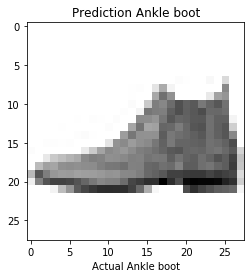

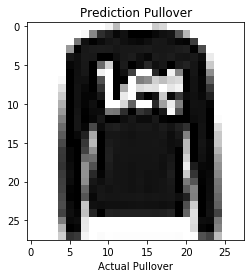

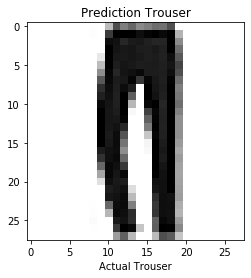

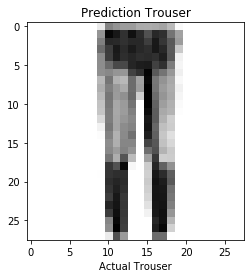

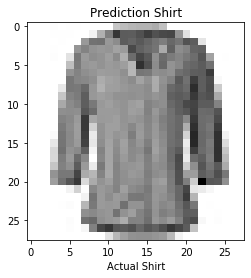

In [2]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = keras.datasets.fashion_mnist
# X = np.array(data.data)
# y = np.array(data.target)
# X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2)
(train_images,train_labels),(test_images,test_labels) = data.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255.0
test_images = test_images/255.0

# print(train_images[7]) 

# plt.imshow(train_images[7])
# plt.show()

# dense means that we are drawing a fully connected network of neurons
# activation means the model or algo that we are applying to that layer
# relu - rectified linear unit is like the sigmoid function 
# softmax - it outputs the values of the neurons in the o/p layer in 
# in such a way that the sum of the o/p is equal to 1
# generally speaking it shows the probability of the o/p to be equal to that neuron

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation ="relu"),
    keras.layers.Dense(10,activation = "softmax")
])

model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(train_images,train_labels,epochs = 5)
# Usage of metrics
#A 'metric' is a function that is used to judge the performance of your model. ...
#A metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model.

# Loss function is an important part in artificial neural networks, which is used
#to measure the inconsistency between predicted value (^y ) and actual label (y ). 
#It is a non-negative value, where the robustness of model increases along with the decrease of the value of loss function

# 'Adam' is an adaptive learning rate optimization algorithm that's been designed specifically for training deep neural networks.
#The algorithms leverages the power of adaptive learning rates methods to find individual learning rates for each parameter.

# test_loss, test_acc = model.evaluate(test_images,test_labels)
# print("tested acc: ",test_acc)

prediction = model.predict(test_images)
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap= plt.cm.binary)
    plt.xlabel("Actual "+ str(class_names[test_labels[i]]))
    plt.title("Prediction "+str(class_names[np.argmax(prediction[i])]))
    plt.show()
    